# Project 2 - WIP

**What:** Estimate the share of residents within an ~800m (~0.5mi) walk of a park.   Instead of Distance, use travel time

**Data:** City parks (open data), Census tracts + ACS population (TIGER/ACS).

**Method:**
- Buffer parks (800 m) → sjoin with tracts to get park-buffer area per tract.
- Aggregate: park-buffer area ÷ tract area; optionally weight by pop.
- Filter: flag tracts < X% access.
- Map: Choropleth of % population/area with park access; label lowest-access tracts.


Data:
County Boundary Layer (EPSG: 4269): https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_county_500k.zip
Census Tracts Layer (EPSG: 4269): https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_tract_500k.zip
ACS (API): https://api.census.gov/data/{year}/acs/acs5   {year} is a parameter in the code. Makes code a little more extensible. 2023 is the latest So that is what is used.

Cannot find ACS (American Community Survey) data download, so API will be used unless I can find a file download.
API key acquired.  Might be able to use this: https://www.arcgis.com/home/item.html?id=f430d25bf03744edbb1579e18c4bf6b8


import requests for pulling ACS data table

Missoula County FIPS: 30063


Total population from ACS shown in Table B01003, ref. https://censusreporter.org/tables/B01003/


Map from initial data exploration, using Missoula County as a test for census tracts and admin boundaries

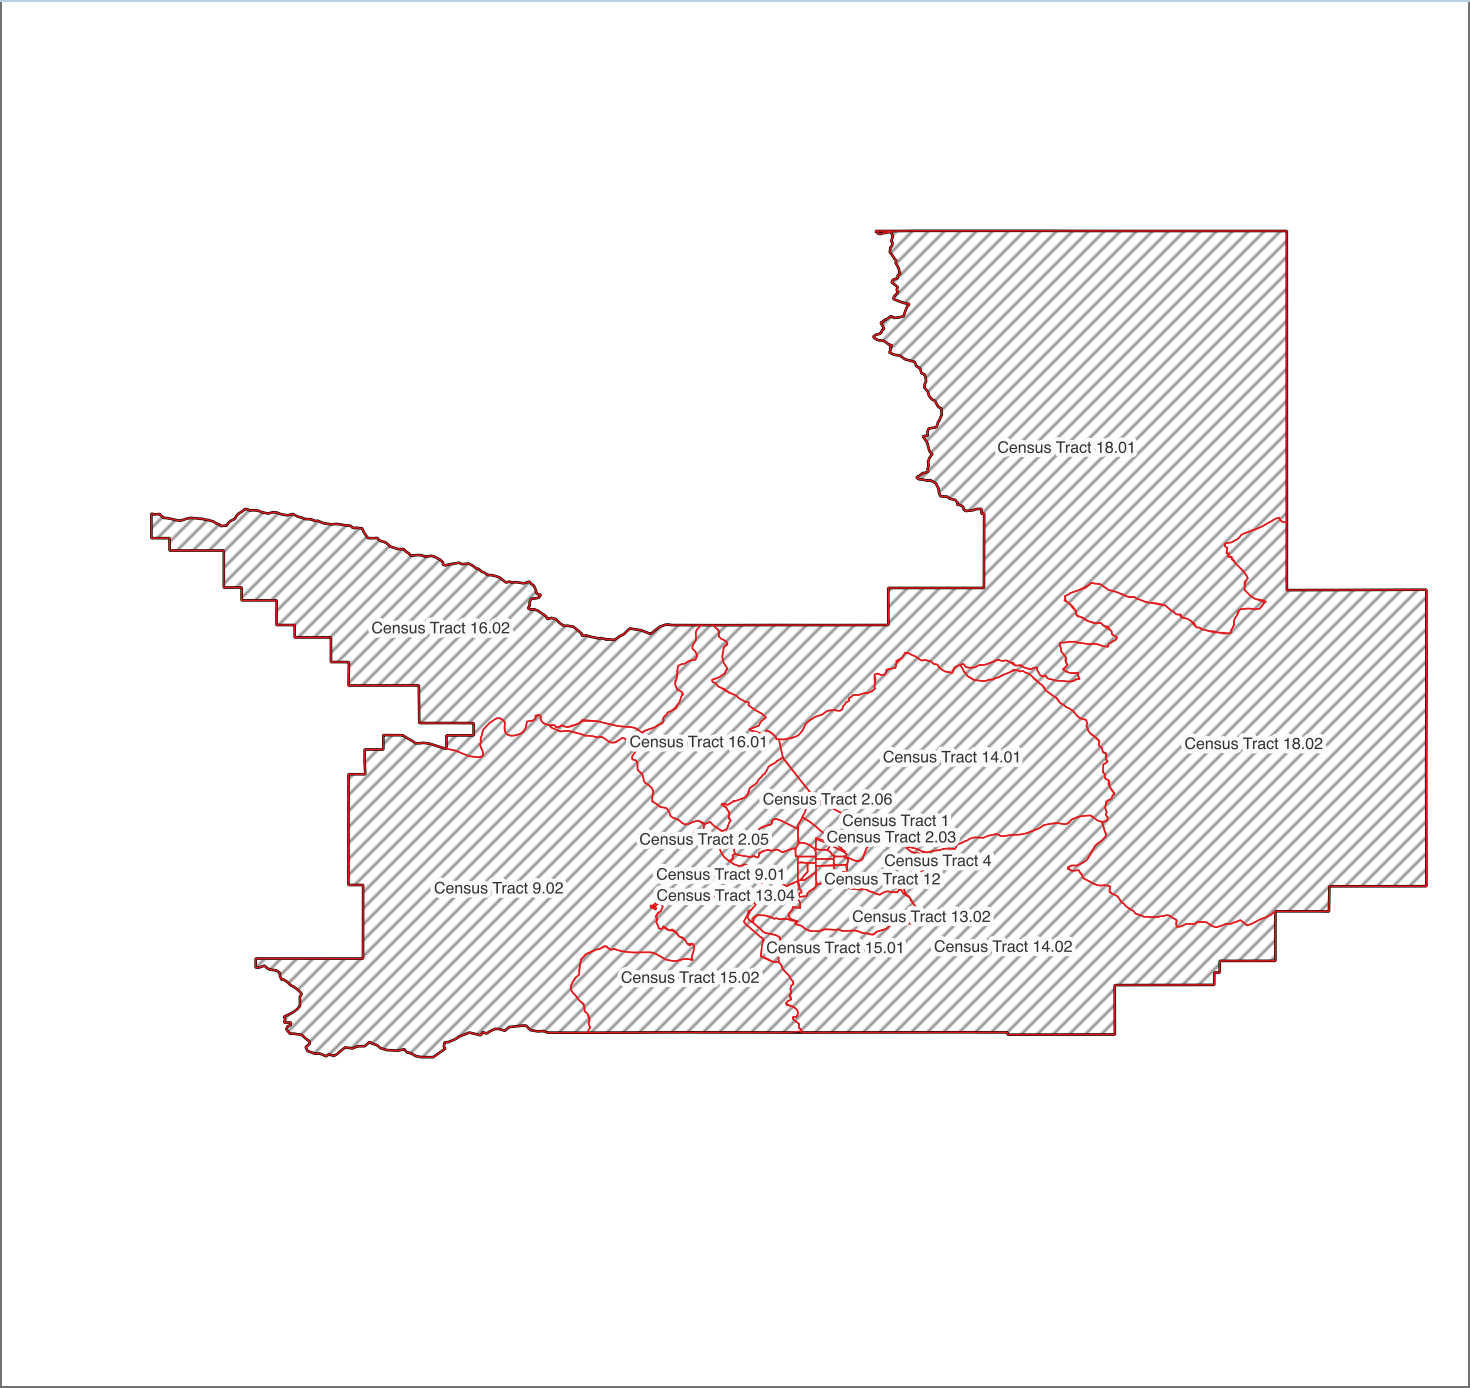


Use .env for ACS API key; this keeps key local and secure

## CODE Begin

### Module imports

In [15]:
import os
import io
import zipfile
import tempfile
import geopandas as gpd


### Set parameters

In [16]:
# Tracts zip file path
tracts_zip = "data/cb_2023_us_tract_500k.zip"

# Counties zip file path
countes_zip = "data/cb_2023_us_county_500k.zip"

# Need to find CRS for region used - for measuring distance
crs = 4326

Function to unzip and read zipped files into tempfile. This is specifically looking for .shp

In [17]:
def read_zipped_file(zip_path):
    """Read zipped file into tempfile"""
    with zipfile.ZipFile(zip_path) as z, tempfile.TemporaryDirectory() as tmpdir:
        z.extractall(tmpdir)
        shp_rel = [n for n in z.namelist() if n.lower().endswith(".shp")][0]
        shp_path = os.path.join(tmpdir, shp_rel)
        return gpd.read_file(shp_path)

### Call function to read zip files

In [19]:
tracts = read_zipped_file(tracts_zip)
counties = read_zipped_file(countes_zip)

# tracts = read_zipped_file(tracts_zip).to_crs(crs)
# counties = read_zipped_file(countes_zip).to_crs(crs)


print("Tracts CRS:", tracts.crs)
print("Counties CRS:", counties.crs)
# print(tracts)
# print(counties)

print("TRACTS \n", tracts.head(10))
print("COUNTIES \n", counties.head(10))



Tracts CRS: epsg:4269
Counties CRS: epsg:4269
TRACTS 
   STATEFP COUNTYFP TRACTCE               GEOIDFQ        GEOID    NAME  \
0      06      077  005127  1400000US06077005127  06077005127   51.27   
1      06      077  003406  1400000US06077003406  06077003406   34.06   
2      06      077  004402  1400000US06077004402  06077004402   44.02   
3      06      077  001700  1400000US06077001700  06077001700      17   
4      06      077  000401  1400000US06077000401  06077000401    4.01   
5      06      077  003404  1400000US06077003404  06077003404   34.04   
6      37      037  020600  1400000US37037020600  37037020600     206   
7      37      105  030102  1400000US37105030102  37105030102  301.02   
8      37      165  010300  1400000US37165010300  37165010300     103   
9      05      107  480500  1400000US05107480500  05107480500    4805   

              NAMELSAD STUSPS          NAMELSADCO      STATE_NAME LSAD  \
0   Census Tract 51.27     CA  San Joaquin County      California  

Function to pull ACS pop. data

In [ ]:
# ToDo:
# ACS URL should be: "https://api.census.gov/data/<YEAR>/acs/acs5"
# parmeterize {year} for extensibility

def acs_tract_population(state_fips, county_fips_list, year=2023, api_key=None):
    """Placeholder for setup"""
    pass
